# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merged.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
merged["Mouse ID"].nunique()

#mouse_metadata["Mouse ID"].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged[merged.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merged[merged.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged = merged[merged["Mouse ID"] != "g989"]

In [69]:
# Checking the number of mice in the clean DataFrame.
merged["Mouse ID"].nunique()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame ({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.": stdev,
    "Tumor Volume Std. Err.": sem
})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
sum_stats = summary.describe()
sum_stats
# Using the aggregation method, produce the same summary statistics in a single line
sum_agg = merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
sum_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

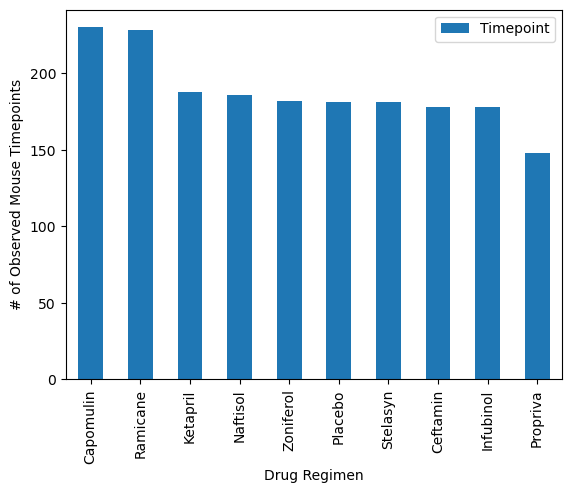

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
id_timepoint = merged.groupby("Drug Regimen").count().reset_index()

plot_sort = id_timepoint.sort_values("Timepoint", ascending = False)

plot_sort.plot(x="Drug Regimen", y="Timepoint", kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")


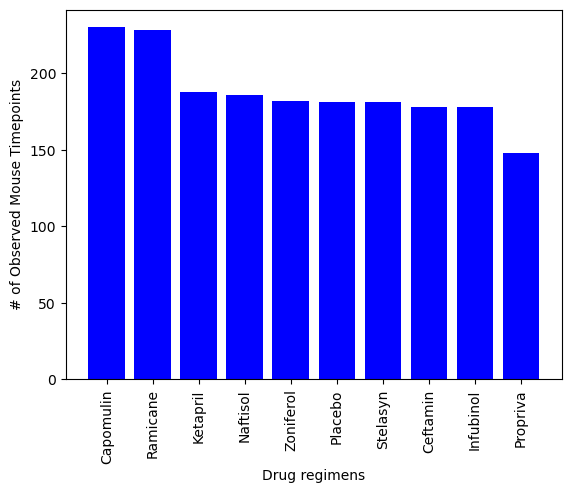

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(plot_sort["Drug Regimen"], plot_sort["Timepoint"], color="blue")
plt.xlabel("Drug regimens")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='Sex'>

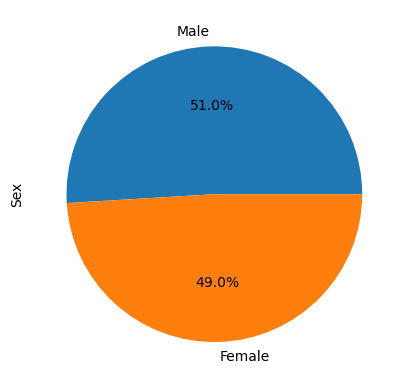

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = merged["Sex"].value_counts()
sex.plot.pie(autopct='%1.1f%%')
#drop = ["Drug Regimen","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites
#"]


([<matplotlib.patches.Wedge at 0x23017797b20>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

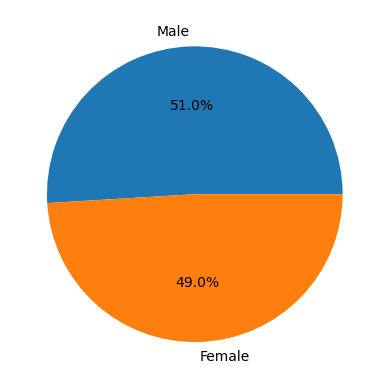

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = sex.values
labels = sex.index

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = merged[merged["Drug Regimen"].isin(drug)]
# Start by getting the last (greatest) timepoint for each mouse
timepoint= drugs.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].idxmax()
timepoint_df= drugs.loc[timepoint].reset_index()
timepoint_df=timepoint_df.rename(columns={"Timepoint": "Greatest Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drugs_merged = pd.merge(merged,timepoint_df[['Mouse ID', 'Drug Regimen', 'Greatest Timepoint']], on=["Mouse ID", "Drug Regimen"])
drugs_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,45
810,z581,Infubinol,Female,24,25,30,56.286750,2,45
811,z581,Infubinol,Female,24,25,35,58.628399,3,45
812,z581,Infubinol,Female,24,25,40,60.053740,3,45


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    subset = drugs_merged.loc[drugs_merged["Drug Regimen"] == treatment, :]
    quartiles = subset["Tumor Volume (mm3)"].quantile([0.25, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = drugs_merged.loc[drugs_merged["Drug Regimen"] == treatment, ["Mouse ID", "Tumor Volume (mm3)"]]
    
    # add subset 
    tumor.append(subset["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    outlier = subset.loc[(subset["Tumor Volume (mm3)"] < lower) | (subset["Tumor Volume (mm3)"] > upper), "Tumor Volume (mm3)"]
    print(f"{treatment} potential outliers: {outlier.tolist()}")

Capomulin potential outliers: [25.47214326, 23.34359787]
Ramicane potential outliers: [22.05012627]
Infubinol potential outliers: []
Ceftamin potential outliers: []


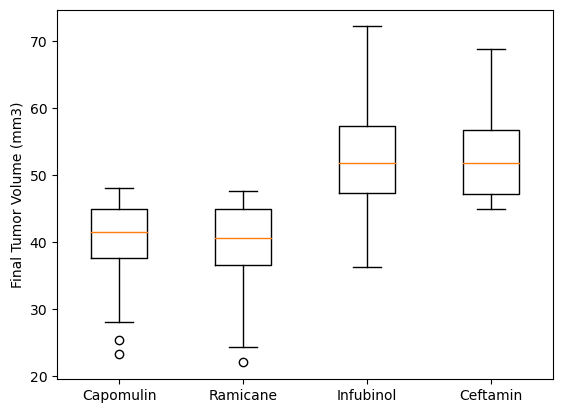

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax= plt.subplots()
ax.boxplot(tumor, labels=treatments)
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

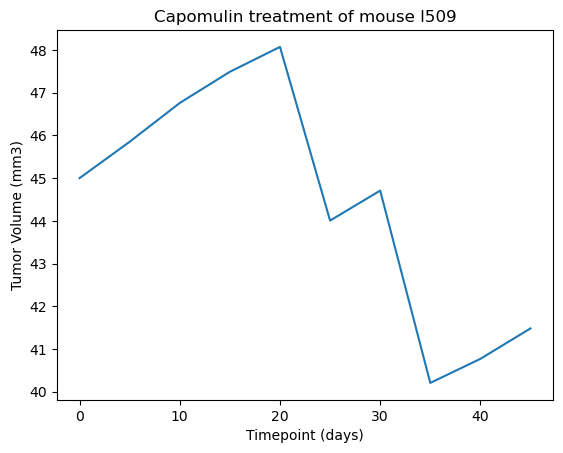

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = merged.loc[merged["Drug Regimen"] == "Capomulin", :]
single = "l509"
plots = capomulin.loc[capomulin["Mouse ID"] == single,:]

plt.plot(plots["Timepoint"], plots["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse l509")
plt.show()

C:\Users\Mason\AppData\Local\Temp\ipykernel_40752\1027320345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight = capomulin.groupby("Mouse ID").mean()


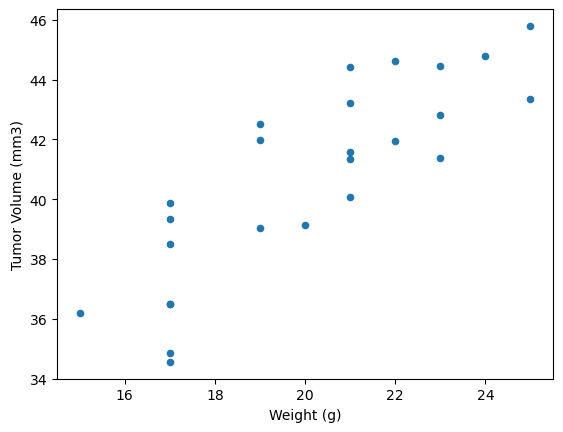

In [94]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = capomulin.groupby("Mouse ID").mean()
weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

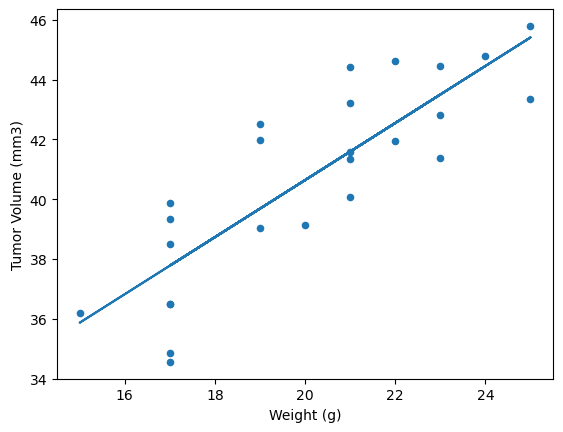

The correlation between mouse weight and the average tumor volume is 0.8419


In [99]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
x = weight["Weight (g)"]
y = weight["Tumor Volume (mm3)"]
slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
reg = x * slope + intercept
plt.plot(x, reg)
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 4)}")